# Deep convolutional neural networks 

In the previous chapters, you got a sense 
of how to classify images with convolutional neural network (CNNs). 
Specifically, we implemented a CNN with two convolutional layers 
interleaved with pooling layers, a singly fully-connected hidden layer,
and a softmax output layer. 
That architecture loosely resembles a neural network affectionately named LeNet,
in honor [Yann LeCun](http://yann.lecun.com/),
an early pioneer of convolutional neural networks and the first 
to [reduce them to practice in 1989](http://www.mitpressjournals.org/doi/abs/10.1162/neco.1989.1.4.541) 
by training them with gradient descent (i.e. backpropagation).
At the time, this was a fairly novel idea.
A cadre of researchers interested in biologically-inspired learning models had taken to investigating artificial simulations of neurons as learning models. 
However, as remains true to this day, few researchers believed that real brains learn by gradient descent.
The community of neural networks researchers had explored many other learning rules.
LeCun demonstrated that CNNs trained by gradient descent,
could get state-of-the-art results on the task of recognizing hand-written digits. 
These groundbreaking results put CNNs on the map.

However, in the intervening years, neural networks were superseded by numerous other methods.
Neural networks were considered slow to train, 
and there wasn't wide consensus on whether it was possible 
to train very deep neural networks from a random initialization of the weights. 
Moreover, training networks with many channels, layers, 
and parameters required excessive computation 
relative to the resources available decades ago. 
While it was possible to train a LeNet for MNIST digit classification and get good scores,
neural networks fell out of favor on larger, real-world datasets. 

Instead researchers precomputed features based on a mixture of elbow grease, 
knowledge of optics, and black magic. 
A typical pattern was this: 
1. Grab a cool dataset
2. Preprocess it with giant bag of predetermined feature functions
3. Dump the representations into a simple linear model to do the *machine learning part*. 

This was the state of affairs in computer vision up until 2012, 
just before deep learning began to change the world of applied machine learning. 
One of us (Zack) entered graduate school in 2013. 
A friend in graduate school summarized the state of affairs thus:

If you spoke to machine learning researchers, 
they believed that machine learning was both important and beautiful.
Elegant theories proved the properties of various classifiers.
The field of machine learning was thriving, rigorous and eminently useful.
However, if you spoke to a computer vision researcher, you'd hear a very different story.
The dirty truth of image recognition, they'd tell you,
is that the really important aspects of the ML for CV pipeline were data and features.
A slightly cleaner dataset, or a slightly better hand-tuned feature mattered a lot to the final accuracy.
However, the specific choice of classifier was little more than an afterthought.
At the end of the day you could throw your features in a logistic regression model, a support vector machine, or any other classifier of choice, and they would all perform roughly the same. 






## Learning the representations

Another way to cast the state of affairs is that 
the most important part of the pipeline was the representation.
And up until 2012, this part was done mechanically, based on some hard-fought intuition.
In fact, engineering a new set of feature functions, improving results, and writing up the method was a prominent genre of paper.

Another group of researchers had other plans. They believed that features themselves ought to be learned. 
Moreover they believed that to be reasonably complex, the features ought to be hierarchically composed.
These researchers, including Yann LeCun, Geoff Hinton, Yoshua Bengio, Andrew Ng, Shun-ichi Amari, and Juergen Schmidhuber believed that by jointly training many layers of a neural network, they might come to learn hierarchical representations of data. 
In the case of an image, the lowest layers might come to detect edges, colors, and textures. 

![](../img/filters.png)


Higher layers might build upon these representations to represent larger structures, like eyes, noses, blades of grass, and features. 
Yet higher layers might represent whole objects like people, airplanes, dogs, or frisbees. 
And ultimately, before the classification layer, the final hidden state might represent a compact representation of the image that summarized the contents in a space where data belonging to different categories would be linearly separable.

## Missing ingredient 1: data 

Despite the sustained interest of a committed group of researchers in learning deep representations of visual data, for a long time these ambitions were frustrated. The failure to make progress was owed to a few factors. First, while this wasn't yet known, supervised deep models with many representation require large amounts of labeled training data in order to outperform classical approaches. However, given the limited storage capacity of computers and the comparatively tighter research budgets in the 1990s and prior, most research relied on tiny datasets. For example, many credible research papers relied on a small set of corpora hosted by UCI, many of which contained hundreds or a few thousand images.

This changed in a big way when Fei-Fei Li presented the ImageNet database in 2009. The ImageNet dataset dwarfed all previous research datasets. It contained one million images: one thousand each from one thousand distinct classes. 

![](../img/imagenet.jpeg)

This dataset pushed both computer vision and machine learning research into a new regime where the previous best methods would no longer dominate. 

## Missing ingredient 2: hardware

Deep Learning has a voracious need for computation. This is one of the main reasons why in the 90s and early 2000s algorithms based on convex optimization were the preferred way of solving problems. After all, convex algorithms have fast rates of convergence, global minima, and efficient algorithms can be found. 

The game changer was the availability of GPUs. They had long been tuned for graphics processing in computer games. In particular, they were optimized for high throughput 4x4 matrix-vector products, since these are needed for many computer graphics tasks. Fortunately, the math required for that is very similar to convolutional layers in deep networks. Furthermore, around that time, NVIDIA and ATI had begun optimizing GPUs for general compute operations, going as far as renaming them GPGPU (General Purpose GPUs). 

To provide some intuition, consider the cores of a modern microprocessor. Each of the cores is quite powerful, running at a high clock frequency, it has quite advanced and large caches (up to several MB of L3). Each core is very good at executing a very wide range of code, with branch predictors, a deep pipeline and lots of other things that make it great at executing regular programs. This apparent strength, however, is also its Achilles' heel: general purpose cores are very expensive to build. They require lots of chip area, a sophisticated support structure (memory interfaces, caching logic between cores, high speed interconnects, etc.), and they're comparatively bad at any single task. Modern laptops have up to 4 cores, and even high end servers rarely exceed 64 cores, simply because it is not cost effective. 

Compare that with GPUs. They consist of 100-1000 small processing elements (the details differ somewhat betwen NVIDIA, ATI, ARM and other chip vendors), often grouped into larger groups (NVIDIA calls them warps). While each core is relatively weak, running at sub-1GHz clock frequency, it is the total number of such cores that makes GPUs orders of magnitude faster than CPUs. For instance, NVIDIA's latest Volta generation offers up to 120 TFlops per chip for specialized instructions (and up to 24 TFlops for more general purpose ones), while floating point performance of CPUs has not exceeded 1 TFlop to date. The reason for why this is possible is actually quite simple: firstly, power consumption tends to grow *quadratically* with clock frequency. Hence, for the power budget of a CPU core that runs 4x faster (a typical number) you can use 16 GPU cores at 1/4 the speed, which yields 16 x 1/4 = 4x the performance. Furthermore GPU cores are much simpler (in fact, for a long time they weren't even *able* to execute general purpose code), which makes them more energy efficient. Lastly, many operations in deep learning require high memory bandwidth. Again, GPUs shine here with buses that are at least 10x as wide as many CPUs. 

Back to 2012. A major breakthrough came when Alex Krizhevsky and Ilya Sutskever 
implemented a deep convolutional neural network that could run on GPU hardware. They realized that 
the computational bottlenecks in CNNs (convolutions and matrix multiplications) are all operations that could be parallelized in hardware. Using two NIVIDA GTX 580s with 3GB of memory (depicted below) they implemented fast convolutions. The code [cuda-convnet](https://code.google.com/archive/p/cuda-convnet/) was good enough that for several years it was the industry standard and powered the first couple years of the deep learning boom.  

![](../img/gtx-580-gpu.jpeg)


## AlexNet

In 2012, using their cuda-convnet implementation on an eight-layer CNN, 
Khrizhevsky, Sutskever and Hinton won the ImageNet challenge on image recognition by a wide margin.
Their model, [introduced in this paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf), is *very* similar to the LeNet architecture from 1995. 

In the rest of the chapter we're going to implement a similar model to the one that they designed. Due to memory constraints on the GPU they did some wacky things to make the model fit. For example, they designed a dual-stream architecture in which half of the nodes live on each GPU. The two streams, and thus the two GPUs only communicate at certain layers. This limits the amount of overhead for keeping the two GPUs in sync with each other. Fortunately, distributed deep learning has advanced a long way in the last few years, so we won't be needing those features (except for very unusual architectures). In later sections, we'll go into greater depth on how you can speed up your networks by training on many GPUs (in AWS you can get up to 16 on a single machine with 12GB each), and how you can train on many machine simultaneously.

In [1]:
# import PyTorch and its related packages
import torch as T
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

# set default device based on CUDA's availability
device = 'cuda' if T.cuda.is_available() else 'cpu'
device

'cuda'

## Load up a dataset

Now let's load up a dataset. This time we're going to import the CIFAR dataset. Cifar is a much smaller color dataset, roughly the dimensions of ImageNet. It contains 50,000 training and 10,000 test images. The images belong in equal quantities to 10 categories. While this dataset is considerably smaller than the 1M image, 1k category, 256x256 ImageNet dataset, we'll use it here to demonstrate the model because we don't want to assume that you have a license for the ImageNet dataset or a machine that can store it comfortably. To give you some sense for the proportions of working with ImageNet data, we'll upsample the images to 224x224 (the size used in the original AlexNet).  

In [2]:
transform = transforms.Compose(
    [transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32
image_size = (32, 32, 3)

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = T.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = T.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


## The AlexNet architecture

This model has some notable features. 
First, in contrast to the relatively tiny LeNet, 
AlexNet contains 8 layers of transformations,
five convolutional layers followed by two fully connected hidden layers and an output layer.

The convolutional kernels in the first convolutional layer are reasonably large at $11 \times 11$, in the second  they are $5\times5$ and thereafter they are $3\times3$. Moreover, the first, second, and fifth convolutional layers are each followed by overlapping pooling operations with pool size $3\times3$ and stride ($2\times2$). 

Following the convolutional layers, the original AlexNet had fully-connected layers with 4096 nodes each. Using `gluon.nn.Sequential()`, we can define the entire AlexNet architecture in just 14 lines of code.  Besides the specific architectural choices and the data preparation, we can recycle all of the code we'd used for LeNet verbatim. 

In [3]:
class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

In [4]:
net = AlexNet()
net.to(device)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

## Optimizer and loss function

In [5]:
criterion = nn.CrossEntropyLoss()

# also the optimizer
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [6]:
train_loss = []
test_loss = []
train_acc = []
test_acc = []

for epoch in range(1, 33):  # loop over the dataset multiple times
    
    running_loss = .0
    correct = 0
    total = 0
    for i, data in enumerate(train_loader):
        # get the inputs
        inputs, labels = data
        if device == 'cuda':
            inputs, labels = inputs.to(device), labels.to(device)

        # reset the parameter gradients
        optimizer.zero_grad()

        # forward
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        # backward
        loss.backward()
        # optimize
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = T.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    running_loss /= len(train_loader)
    train_loss.append(running_loss)
    running_acc = correct / total
    train_acc.append(running_acc)
    
    if epoch % 4 == 0:
        print('\nEpoch: {}'.format(epoch))
        print('Train Acc. => {:.3f}%'.format(100 * running_acc), end=' | ')
        print('Train Loss => {:.5f}'.format(running_loss))
    
    # evaluate on the test set
    # note this is usually performed on the validation set
    # for simplicity we just evaluate it on the test set
    with T.no_grad():
        correct = 0
        total = 0
        test_running_loss = .0
        for data in test_loader:
            inputs, labels = data
            if device == 'cuda':
                inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            test_running_loss += loss.item()
            _, predicted = T.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_running_loss /= len(test_loader)
        test_loss.append(test_running_loss)
        test_running_acc = correct / total
        test_acc.append(test_running_acc)
        
        if epoch % 4 == 0:
            print('Test Acc.  => {:.3f}%'.format(100 * test_running_acc), end=' | ')
            print('Test Loss  => {:.5f}'.format(test_running_loss))

print('Finished Training')


Epoch: 4
Train Acc. => 54.098% | Train Loss => 1.26054
Test Acc.  => 58.540% | Test Loss  => 1.16776

Epoch: 8
Train Acc. => 72.956% | Train Loss => 0.76947
Test Acc.  => 72.490% | Test Loss  => 0.80700

Epoch: 12
Train Acc. => 80.942% | Train Loss => 0.54425
Test Acc.  => 77.580% | Test Loss  => 0.65472

Epoch: 16
Train Acc. => 86.604% | Train Loss => 0.38182
Test Acc.  => 80.860% | Test Loss  => 0.57820

Epoch: 20
Train Acc. => 90.884% | Train Loss => 0.25802
Test Acc.  => 82.450% | Test Loss  => 0.57338

Epoch: 24
Train Acc. => 93.760% | Train Loss => 0.17625
Test Acc.  => 80.230% | Test Loss  => 0.70319

Epoch: 28
Train Acc. => 96.064% | Train Loss => 0.11221
Test Acc.  => 82.980% | Test Loss  => 0.67138

Epoch: 32
Train Acc. => 97.236% | Train Loss => 0.07706
Test Acc.  => 82.570% | Test Loss  => 0.76871
Finished Training


## Visualization

In [7]:
import matplotlib.pyplot as plt

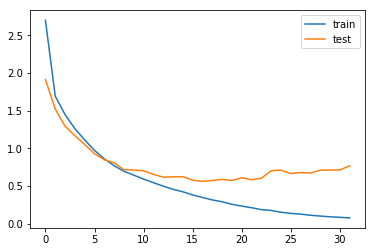

In [8]:
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.legend()
plt.show()

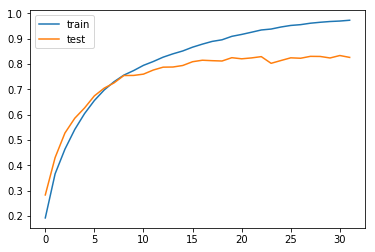

In [9]:
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.legend()
plt.show()